
# CODE TO PERFORM SIMPLE LINEAR REGRESSION
# Dr. Ryan @STEMplicity
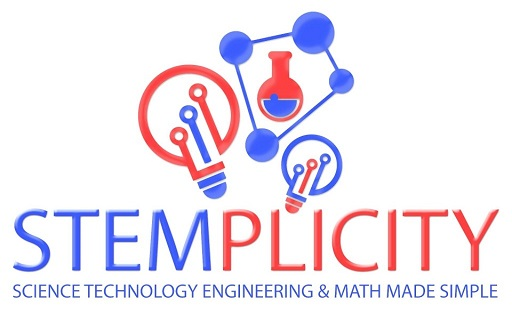



# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

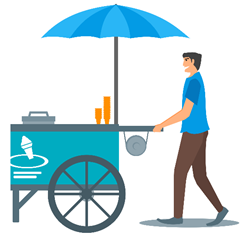

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd # para df e iterações
import numpy as np # analises e tal
import matplotlib.pyplot as plt # visualizar dados
import seaborn as sns # também visualizar dados, como algo mais avançado que o matplotlib
%matplotlib inline

# STEP #2: IMPORT DATASET

In [2]:
# Importar os dados do ice Cream
# Criamos um dataframe com nome de IceCream

IceCream = pd.read_csv('IceCreamData.csv')

In [3]:
# Visualizando as 5 primeiras linhas de dados

IceCream.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Visualizando 10 linhas, conforme pedido na aula

IceCream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [5]:
# Visualizando as últimas linhas

IceCream.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
# Visualizando as últimas 10 linhas conforme pedido

IceCream.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
# Um resumo dos dados pode ser visto usando o .describe()

IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
# Vemos mais informações do dataframe
# Como posso ver, há duas colunas com 500 elementos cada, do tipo float.
# Não temos null, ou seja, sem dados faltantes

IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET
Vamos começar a visualizar os dados.

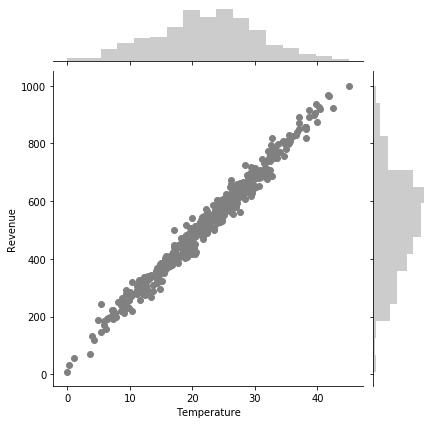

In [10]:
# O jointplot pede x e y
# Coloco a temperatura no eixo x e a receita no y
# Insiro qual a Fonte dos dados, no caso o dataframe IceCream

sns.jointplot(x = 'Temperature', y = 'Revenue', data = IceCream, color = 'gray')

### Analisando o Gráfico Acima
Intuitivamente notamos que talvez podemos traçar uma linha pegando esses dados.

Também vemos a distribuição de cada coluna de dados.


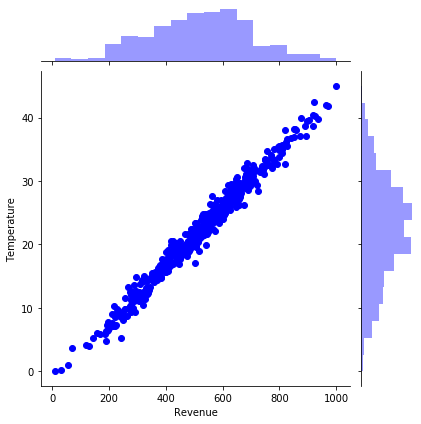

In [12]:
# Plotando os dados nos eixos opostos

sns.jointplot(x = 'Revenue', y = 'Temperature', data = IceCream, color = 'blue')

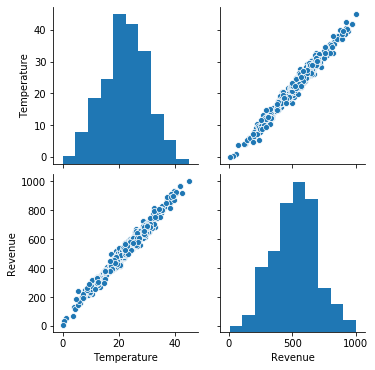

In [13]:
# Vamos usar uma ferramenta poderosa, o pairplot
# Note que essa função já faz a análise tanto da coluna com a outra quanto com ela mesma.
# Nesse caso posso usar o pairplot direto ao invés de jointplot

sns.pairplot(IceCream)

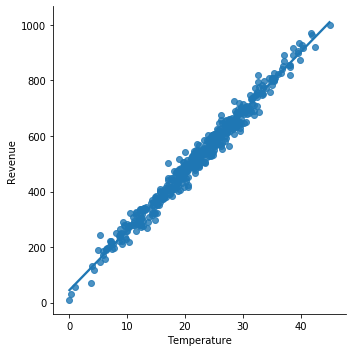

In [15]:
# O lmplot coloca a melhor linha reta possível no gráfico
# O seaborn já nos mostra se uma linha reta daria uma boa visão para esse conjunto de dados

sns.lmplot(x = 'Temperature', y = 'Revenue', data = IceCream)

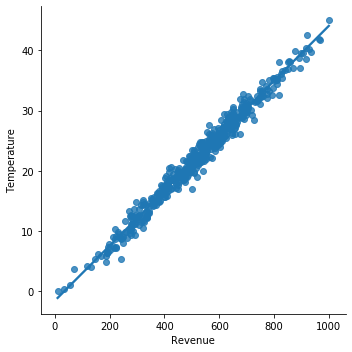

In [17]:
sns.lmplot(x = 'Revenue', y = 'Temperature', data = IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [18]:
# Começamos dividindo os dados em x e y
# X é nosso input, ou nossa variável independente
# Y é nosso target (output; prediction), ou nossa variável dependente

IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [20]:
# Definindo o X como a variável independente (ou input)
# Atenção para os colchetes duplos

X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [23]:
# Repare no y em caixa baixa
# Por que o instrutor nesse caso usou apenas 1 par de colchetes?

y = IceCream['Revenue']

In [24]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [25]:
# Vamos importar o sickitlearn para agora dividir em treino e teste
# O train_test_split é uma classe responsável por dividir os dados como quisermos, para treino e teste

from sklearn.model_selection import train_test_split

In [26]:
# train_test_split e usar Shift+Tab para ver informações da classe

In [36]:
# Abaixo estamos criando os dados de teste e treino
# Note que passamos os inputs e outputs para a classe train_test_split, bem como o tamanho do conjunto para teste
# Random State vai ficar igual o dele

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Vamos dar uma olhada em X_train
# Olha como os dados estão 'shuffled'

X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [38]:
# Repare o número menor de linhas, pois nosso conjunto de teste é de 33% do conjunto total

X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790102
438,17.132795


In [39]:
# Esse método nos diz a forma do cojunto de dados, no caso

X_train.shape

(400, 1)

In [40]:
X_test.shape

(100, 1)

### Importante
O número de linhas de X_train e y_train, bem como X_test e y_test, precisam ser iguais!

In [41]:
y_train.shape

(400,)

In [42]:
y_test.shape

(100,)

In [43]:
# Fazendo o minichallenge, fui pedido para fazer o conjunto de teste em 25%

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vou só modificar acima!

# STEP#5: TRAIN THE MODEL

In [73]:
# Vamos importar a classe Linear Regression
# Depois faremos algo dito como padrão em qualquer linear regression
# Instanciar um objeto para fora da classe (?) 

from sklearn.linear_model import LinearRegression

# Quando colocamos o fit_intercept como True estamos basicamente pedindo para o LinearRegressor 
# obter os 2 parâmetros: slope (m) e o y-intercept (b)
# Colocando o True estamos assumindo que há y-intercept para retornar
# Com False o b estará em 0
regressor = LinearRegression(fit_intercept = True)


regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# Vamos visualizar nosso modelo
# Estamos 'printando' o coeficiente e o intercept
# Basicamente esses são os dois parâmetros que estávamos procurando no projeto

print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.38197386]
Linear Model Coefficient (b) 46.804641277423684


## Isso Significa:
Que minha linha reta lá em cima está com slope de 21 aproximadamente, o que faz sentido.



## Fiz um teste colocando o fit_intercept = False

regressor = LinearRegression(fit_intercept = False)

O resultado foi:

Linear Model Coefficient (m) [23.24452656]

Linear Model Coefficient (b) 0.0

**Com o intercept como False minha linha foi forçada a passar pelo 0**

# STEP#6: TEST THE MODEL 

In [75]:
# Antes, vamos visualizar nosso X_test

X_test.shape

(100, 1)

In [76]:
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790102
438,17.132795


In [77]:
# Relembrando, no 'regressor' é onde está nosso modelo, toda a 'inteligência'
# O regressor.predict(X_test) deverá gerar a predição de y, por isso y_predict

# Nós simplesmente estamos usando os dados acima na equação do modelo (y = mx + b)
# Eu estou dando a TEMPERATURA e com isso tudo prevendo a RECEITA

y_predict = regressor.predict(X_test)

In [78]:
# Em um mundo ideal o y_predict seria idêntico ao y_test

y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

In [79]:
y_test

361    659.873287
73     623.248701
374    559.135869
155    497.752318
104    627.901841
          ...    
347    564.310532
86     643.944327
75     653.986736
438    412.082357
15     469.909033
Name: Revenue, Length: 100, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand(Trainig Set)')

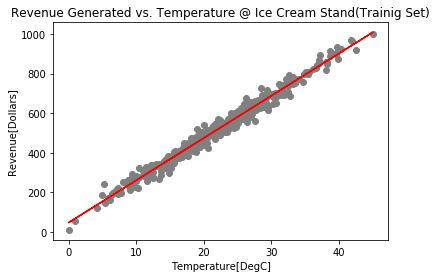

In [80]:
# Vamos agora Visualizar nossos dados
# Vamos fazer dois plots

plt.scatter(X_train, y_train, color='gray')

# simplesmente colocando os inputs e a predição e visualizar em linha, por isso o 'plot'
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature[DegC]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand(Trainig Set)')

Text(0.5, 1.0, 'Testing')

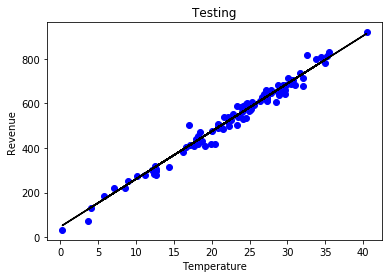

In [81]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'black')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Testing')

### Algumas Observações:
Sobre o slope e o y-intercept utilizando o **fit_intercept=True**, eles fazem sentido, pois o slope é positivo, e o 'b' atinge o eixo 'y' numa região que deve ser equivalente ao valor de 46.

In [84]:
# Digamos que temos um novo valor de temperatura
# Quero prever qual seria minha Receita com uma temperatura dessas

T = [[40]]

In [85]:
# Posso 'chamar' meu regressor, meu modelo, onde minhas informações estão contidas
# Coloco apenas o input, a Temperatura

revenue = regressor.predict(T)

In [86]:
revenue

array([902.08359549])

In [114]:
t1 = [[35]]
t2 = [[15]]
t3 = [[55]]

In [112]:
revenuet1 = regressor.predict(t1)

In [113]:
revenuet1

array([795.17372621])

In [90]:
revenuet2 = regressor.predict(t2)

In [91]:
revenuet2

array([367.53424911])

In [92]:
revenuet3 = regressor.predict(t3)

In [93]:
revenuet3

array([1222.81320332])

In [119]:
df2 = pd.DataFrame(np.array([[35,15,55], [revenuet1[0],revenuet2[0],revenuet3[0]]])).T

In [126]:
df2

,0,1
0,35.0,795.173726
1,15.0,367.534249
2,55.0,1222.813203


In [127]:
df2.columns = ['Temperature','Revenue']

In [128]:
 df2

,Temperature,Revenue
0,35.0,795.173726
1,15.0,367.534249
2,55.0,1222.813203


Text(0.5, 1.0, 'New Predictions')

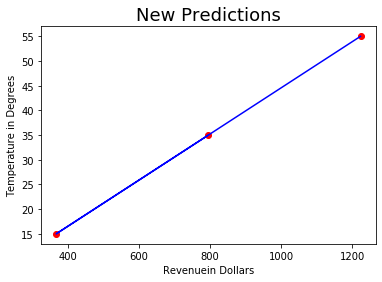

In [131]:
plt.scatter(df2['Revenue'],df2['Temperature'], color='red')
plt.plot(df2['Revenue'],df2['Temperature'], color='blue')
plt.xlabel('Revenuein Dollars')
plt.ylabel('Temperature in Degrees')
plt.title('New Predictions', fontsize=18)

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION